# Medical Data Visualizer

## The project 
The project will visualize and make calculations from medical examiniation data using the following libraries:
1. Matplotlib 
2. Seaborn 
3. Pandas. 
In addition to the given libraries, the project will also display the process of data cleaning, to support the visualizations. 
-----------------------------------------------------------------------------

## The Tasks 
Task 1 : Create an overweight column, to determine whether the person is overweight or not <br>
Task 2 : Normalize the data by making 0 always good and 1 always bad for the columns cholesterol and glucose <br>
Task 3 : With the data made from the previous tasks create a catplot using seaborn <br>
Task 4 : Data Cleaning <br> 
Task 5 : With the data cleaned, plot a heatmap

------------------------------------------------------------------------------

## The data 
| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

`note: the because of task 2, the value type for the columns: cholesterol and glucose will be binary `

-------------------------------------------------------------------------------
## A screenshot of the first 30 rows from `medical_examination.csv` 
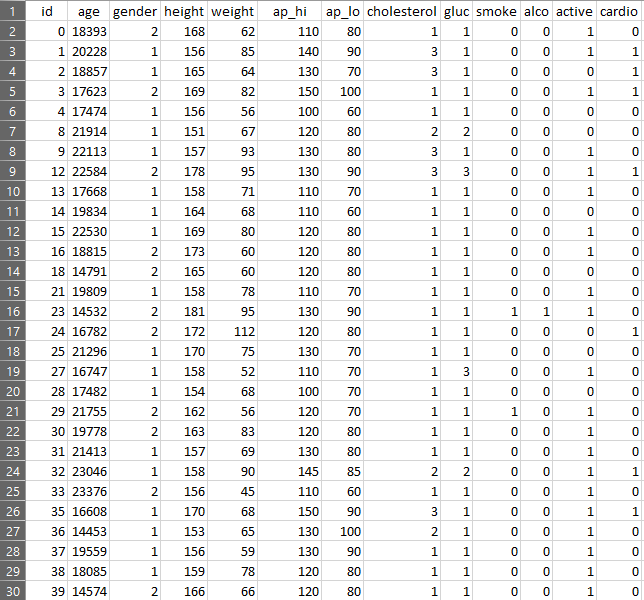

## Imports and the data frame

In [109]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('medical_examination.csv') #storing the csv in the form of a dataframe

## Task 1 : Overweight column

In [110]:
df['overweight'] = 0
for index, row in df.iterrows():
    df.at[index,'overweight'] = 1 if(row['weight']/(row['height']*0.01)**2)>25 else 0

In [111]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


## Task 2 :  Normalizing the data


In [107]:
df['cholesterol']= df['cholesterol'].apply(lambda x:0 if x==1 else 1)

"\nfor index, row in df.iterrows():\n    if(row['cholesterol'] > 1):\n        df.at[index,'cholesterol'] = 1\n    else:\n        df.at[index,'cholesterol'] = 0\n    if(row['gluc'] > 1):\n        df.at[index,'gluc'] = 1\n    else:\n        df.at[index,'gluc'] = 0\n"

## Looking at the dataframe df

In [108]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1


## Task 3 : Catplot

In [5]:
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

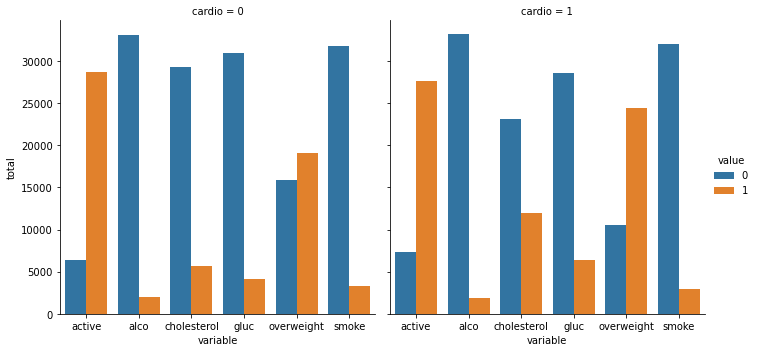

In [6]:
df_cat['total']=1
df_cat = df_cat.groupby(['cardio','variable','value'],as_index=False).count()
fig = sns.catplot(x="variable",y="total",kind="bar",data=df_cat,hue="value",col="cardio").fig
fig.savefig('catplot.png')

## Task 4 : Data Cleaning 

In [8]:
df_heat = df[
    (df['ap_lo']<= df['ap_hi']) & 
    (df['height']>=df['height'].quantile(0.025)) & 
    (df['height']<=df['height'].quantile(0.975)) & 
    (df['weight']>=df['weight'].quantile(0.025)) & 
    (df['weight']<=df['weight'].quantile(0.975))]

## Task 5 : Heatmap

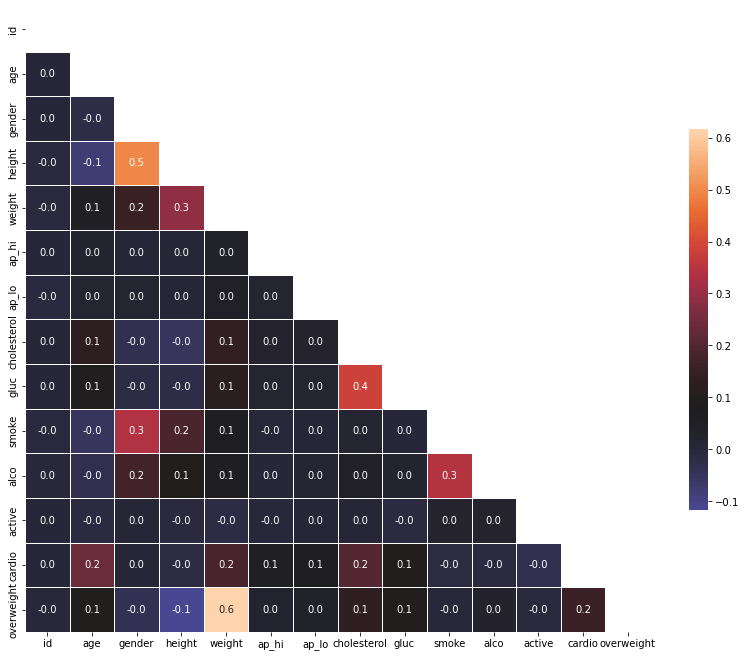

In [10]:
corr = df.corr(method="pearson")
matrix = np.triu(corr)
fig,ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr,linewidths=1,annot=True,mask=matrix,square=True,fmt=".1f",center=0.08,cbar_kws={"shrink":0.5})
fig.savefig('heatmap.png')